#                                    Churn Prediction

In [2]:
#import libraries
import pandas as pd
import numpy as np

In [4]:
#load dataset
df = pd.read_csv('C:\\Users\\sraks\\AIML Internship\\AIML-Internship\\TASK\\T01\\task01.csv')
df.head()

,Customer ID,Country,State,Postal Code,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Australia,New South Wales,2000,Female,0,Yes,No,1.0,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Australia,New South Wales,2035,Female,0,Yes,No,1.0,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Australia,New South Wales,2014,Male,0,No,No,34.0,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Australia,New South Wales,2041,Male,0,No,No,2.0,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Australia,New South Wales,2050,Male,0,No,No,45.0,No,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No


In [5]:
#check for null values
df.isnull().sum()

Customer ID          0
Country              0
State                0
Postal Code          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               1
Phone Service        0
Multiple Lines       0
Internet Service     1
Online Security      1
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      2
Total Charges        8
Churn                0
dtype: int64

In [6]:
#Since the data is huge and null values are very small it can be safely dropped
dfv1 = df.dropna()
dfv1.isna().sum()

Customer ID          0
Country              0
State                0
Postal Code          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [8]:
dfv1['Country'].unique()

array(['Australia'], dtype=object)

In [9]:
dfv1['State'].unique()

array(['New South Wales'], dtype=object)

In [10]:
#Drop the factors that doesnt effect
dfv2 = dfv1.drop(['Customer ID','Country','State','Postal Code'], axis = 'columns')
dfv2.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No


In [11]:
dfv2['Gender'].unique()

array(['Female', 'Male', 'female'], dtype=object)

In [12]:
dfv2['Gender']=dfv2['Gender'].apply(lambda x : x.lower())
dfv2['Gender'].unique()

array(['female', 'male'], dtype=object)

In [13]:
dfv2['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
dfv2['Phone Service'].unique() 

array(['No', 'Yes', ' '], dtype=object)

In [15]:
dfv2.groupby('Phone Service')['Phone Service'].agg('count')

Phone Service
          1
No      461
Yes    4524
Name: Phone Service, dtype: int64

In [16]:
dfv2['Phone Service']=dfv2['Phone Service'].apply(lambda x : 'yes' if x == 'Yes' else 'no')
dfv2.groupby('Phone Service')['Phone Service'].agg('count')

Phone Service
no      462
yes    4524
Name: Phone Service, dtype: int64

In [17]:
dfv2['Multiple Lines'].unique()

array(['No phone service', 'No', 'Yes', ' ', 'N0'], dtype=object)

In [18]:
dfv2.groupby('Multiple Lines')['Multiple Lines'].agg('count')

Multiple Lines
                       2
N0                     1
No                  2393
No phone service     461
Yes                 2129
Name: Multiple Lines, dtype: int64

In [19]:
dfv2["Multiple Lines"] = np.select([dfv2["Multiple Lines"]=='Yes', dfv2["Multiple Lines"]=='No phone service'],
  ["yes", "No phone service"],
  default="no")
dfv2.groupby('Multiple Lines')['Multiple Lines'].agg('count')

Multiple Lines
No phone service     461
no                  2396
yes                 2129
Name: Multiple Lines, dtype: int64

In [20]:
dfv2['Internet Service'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [21]:
dfv2.groupby('Internet Service')['Internet Service'].agg('count')

Internet Service
DSL            1708
Fiber optic    2187
No             1091
Name: Internet Service, dtype: int64

In [22]:
dfv2['Online Security'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [23]:
dfv2.groupby('Online Security')['Online Security'].agg('count')

Online Security
No                     2466
No internet service    1091
Yes                    1429
Name: Online Security, dtype: int64

In [24]:
dfv2['Online Security']=dfv2['Online Security'].apply(lambda x : x.split(' ')[0])
dfv2['Online Security']=dfv2['Online Security'].apply(lambda x : 'yes' if x == 'Yes' else 'no')
dfv2.groupby('Online Security')['Online Security'].agg('count')

Online Security
no     3557
yes    1429
Name: Online Security, dtype: int64

In [25]:
#dfv2["Online Security"] = np.select([dfv2["Online Security"]=='Yes', dfv2["Online Security"]=='No internet service'],
#  ["yes", "No internet service"],
 # default="no")
#dfv2.groupby('Online Security')['Online Security'].agg('count')

In [26]:
dfv2['Online Backup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [27]:
dfv2.groupby('Online Backup')['Online Backup'].agg('count')

Online Backup
No                     2174
No internet service    1091
Yes                    1721
Name: Online Backup, dtype: int64

In [28]:
dfv2['Online Backup']=dfv2['Online Backup'].apply(lambda x : x.split(' ')[0])
dfv2.groupby('Online Backup')['Online Backup'].agg('count')
#dfv2["Online Backup"] = np.select([dfv2["Online Backup"]=='Yes', dfv2["Online Backup"]=='No internet service'],
 # ["yes", "No internet service"],
  #default="no")
#dfv2.groupby('Online Backup')['Online Backup'].agg('count')

Online Backup
No     3265
Yes    1721
Name: Online Backup, dtype: int64

In [29]:
dfv2['Device Protection'].unique()

array(['No', 'Yes', 'No internet service', 'N0'], dtype=object)

In [30]:
dfv2.groupby('Device Protection')['Device Protection'].agg('count')

Device Protection
N0                        1
No                     2170
No internet service    1091
Yes                    1724
Name: Device Protection, dtype: int64

In [31]:
dfv2['Device Protection']=dfv2['Device Protection'].apply(lambda x : 'yes' if x == 'Yes' else 'no')
dfv2.groupby('Device Protection')['Device Protection'].agg('count')
#dfv2["Device Protection"] = np.select([dfv2["Device Protection"]=='Yes', dfv2["Device Protection"]=='No internet service'],
#  ["yes", "No internet service"],
#  default="no")
#dfv2.groupby('Device Protection')['Device Protection'].agg('count')

Device Protection
no     3262
yes    1724
Name: Device Protection, dtype: int64

In [32]:
dfv2['Tech Support'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [33]:
dfv2.groupby('Tech Support')['Tech Support'].agg('count')

Tech Support
No                     2474
No internet service    1091
Yes                    1421
Name: Tech Support, dtype: int64

In [34]:
dfv2['Tech Support']=dfv2['Tech Support'].apply(lambda x : 'yes' if x == 'Yes' else 'no')
dfv2.groupby('Tech Support')['Tech Support'].agg('count')

Tech Support
no     3565
yes    1421
Name: Tech Support, dtype: int64

In [35]:
dfv2['Streaming TV'].unique()
dfv2.groupby('Streaming TV')['Streaming TV'].agg('count')

Streaming TV
N0                        1
No                     1980
No internet service    1090
No internetservice        1
Yes                    1914
Name: Streaming TV, dtype: int64

In [36]:
dfv2['Streaming TV']=dfv2['Streaming TV'].apply(lambda x : 'yes' if x == 'Yes' else 'no')
dfv2.groupby('Streaming TV')['Streaming TV'].agg('count')
#dfv2["Streaming TV"] = np.select([dfv2["Streaming TV"]=='Yes', dfv2["Streaming TV"]=='No internet service', dfv2["Streaming TV"]=='No internetservice'],
#  ["yes", "No internet service","No internet service"],
#  default="no")
#dfv2.groupby('Streaming TV')['Streaming TV'].agg('count')

Streaming TV
no     3072
yes    1914
Name: Streaming TV, dtype: int64

In [37]:
dfv2['Streaming Movies'].unique()
dfv2.groupby('Streaming Movies')['Streaming Movies'].agg('count')

Streaming Movies
                          1
No                     1950
No internet service    1090
Yes                    1945
Name: Streaming Movies, dtype: int64

In [38]:
dfv2['Streaming Movies']=dfv2['Streaming Movies'].apply(lambda x : 'yes' if x == 'Yes' else 'no')
#dfv2.groupby('Streaming Movies')['Streaming Movies'].agg('count')dfv2["Streaming Movies"] = np.select([dfv2["Streaming Movies"]=='Yes', dfv2["Streaming Movies"]=='No internet service'],
#  ["yes", "No internet service"],
#  default="no")
dfv2.groupby('Streaming Movies')['Streaming Movies'].agg('count')

Streaming Movies
no     3041
yes    1945
Name: Streaming Movies, dtype: int64

In [39]:
dfv2['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [40]:
dfv2['Paperless Billing'].unique()

array(['Yes', 'No'], dtype=object)

In [41]:
dfv2['Payment Method'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [42]:
dfv2.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,female,0,Yes,No,1.0,no,No phone service,DSL,no,Yes,no,no,no,no,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,female,0,Yes,No,1.0,no,No phone service,DSL,no,Yes,no,no,no,no,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,male,0,No,No,34.0,yes,no,DSL,yes,No,yes,no,no,no,One year,No,Mailed check,56.95,1889.50,No
3,male,0,No,No,2.0,yes,no,DSL,yes,Yes,no,no,no,no,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,male,0,No,No,45.0,no,No phone service,DSL,yes,No,yes,yes,no,no,One year,No,Bank transfer (automatic),42.3,1840.75,No


In [43]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
dfv2[~dfv2['Monthly Charges'].apply(is_float)]


,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
4774,male,0,No,No,44.0,no,No phone service,DSL,no,Yes,yes,no,yes,yes,One year,Yes,Mailed check,"53,95",2375.4,Yes


In [44]:
dfv2['Monthly Charges'].loc[4774] = 53.95
dfv2['Monthly Charges'].loc[4774]

C:\Users\sraks\AppData\Local\Temp\ipykernel_24104\723641959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv2['Monthly Charges'].loc[4774] = 53.95


53.95

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfv2.Gender = le.fit_transform(dfv2.Gender)
dfv2.Partner = le.fit_transform(dfv2.Partner)
dfv2.Dependents = le.fit_transform(dfv2.Dependents)
dfv2['Phone Service']=le.fit_transform(dfv2['Phone Service'])
dfv2['Multiple Lines']=le.fit_transform(dfv2['Multiple Lines'])
dfv2['Internet Service']=le.fit_transform(dfv2['Internet Service'])
dfv2['Online Security']=le.fit_transform(dfv2['Online Security'])
dfv2['Online Backup']=le.fit_transform(dfv2['Online Backup'])
dfv2['Device Protection']=le.fit_transform(dfv2['Device Protection'])
dfv2['Tech Support']=le.fit_transform(dfv2['Tech Support'])
dfv2['Streaming TV']=le.fit_transform(dfv2['Streaming TV'])
dfv2['Streaming Movies']=le.fit_transform(dfv2['Streaming Movies'])
dfv2['Contract']=le.fit_transform(dfv2['Contract'])
dfv2['Paperless Billing']=le.fit_transform(dfv2['Paperless Billing'])
dfv2['Payment Method']=le.fit_transform(dfv2['Payment Method'])
dfv2['Churn']=le.fit_transform(dfv2['Churn'])
dfv2.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,0,0,1,0,1.0,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,1,0,1.0,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
2,1,0,0,0,34.0,1,1,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
3,1,0,0,0,2.0,1,1,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
4,1,0,0,0,45.0,0,0,0,1,0,1,1,0,0,1,0,0,42.3,1840.75,0


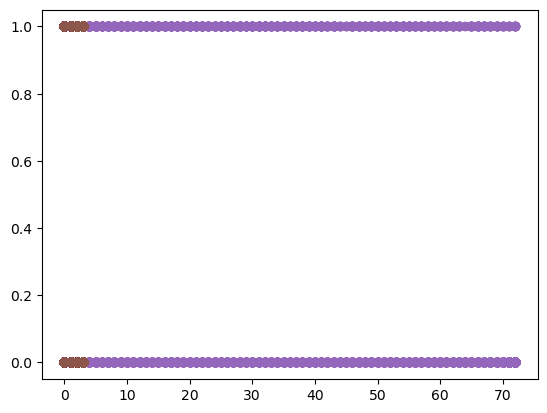

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(dfv2.Gender, dfv2.Churn)
plt.scatter(dfv2['Senior Citizen'], dfv2.Churn)
plt.scatter(dfv2['Partner'], dfv2.Churn)
plt.scatter(dfv2['Dependents'], dfv2.Churn)
plt.scatter(dfv2['tenure'], dfv2.Churn)
plt.scatter(dfv2['Phone Service'], dfv2.Churn)
plt.scatter(dfv2['Multiple Lines'], dfv2.Churn)
plt.scatter(dfv2['Internet Service'], dfv2.Churn)
plt.scatter(dfv2['Online Security'], dfv2.Churn)
plt.scatter(dfv2['Device Protection'], dfv2.Churn)
plt.scatter(dfv2['Tech Support'], dfv2.Churn)
plt.scatter(dfv2['Streaming TV'], dfv2.Churn)
plt.scatter(dfv2['Streaming Movies'], dfv2.Churn)
plt.scatter(dfv2['Contract'], dfv2.Churn)
plt.scatter(dfv2['Paperless Billing'], dfv2.Churn)
plt.scatter(dfv2['Payment Method'], dfv2.Churn)
#plt.scatter(dfv2['Monthly Charges'], dfv2.Churn)
#plt.scatter(dfv2['Total Charges'], dfv2.Churn)

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dfv2.drop(['Churn'], axis = "columns"), dfv2.Churn, test_size=0.2)
len(x_train), len(x_test)

(3988, 998)

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

C:\Users\sraks\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8186372745490982

In [80]:
x_test.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
1305,1,1,1,0,15.0,1,2,1,0,0,0,0,0,1,0,1,0,85.6,1345.55
4826,1,0,0,0,22.0,1,2,1,0,0,0,0,0,1,0,0,2,83.05,1799.30
255,1,0,0,0,10.0,1,1,2,0,0,0,0,0,0,0,1,3,19.85,193.05
3174,0,0,1,0,17.0,1,1,2,0,0,0,0,0,0,1,0,3,19.35,307.00
1308,0,0,0,0,36.0,1,1,0,1,1,1,1,0,1,1,1,3,75.55,2680.15


In [75]:
model.predict(x_test.loc[[1305]]), dfv2.Churn.loc[[1305]]

(array([1]),
 1305    1
 Name: Churn, dtype: int32)

In [81]:
model.predict(x_test.loc[[4826]]), dfv2.Churn.loc[[4826]]


(array([0]),
 4826    0
 Name: Churn, dtype: int32)